## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析，最终分享给你的好友 :P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 登陆微信，并通过向文件传输助手发送打招呼信息**

**任务1 - 统计你的微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

---

## 任务0. 登陆并发送打招呼信息

### 登陆
在这一个章节中，我们已经为你导入`itchat`这个包，并调用`login()`函数登陆网页微信，试试看运行以下代码，并扫描二维码以登陆网页微信。

In [2]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
import itchat
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


In [3]:
# 调用login()函数以登录网页微信
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as Hanne江河


---
**注意：如果您的账号为2018年新注册的账号，或者您倾向于使用假数据来完成此项目，可以将下方代码块中的变量`use_fake_dataset`设置为`True`。并且，您无需完成任务0中的练习和问题，可以直接从任务1开始。**

In [4]:
### 以下内容无需改动，直接运行即可
# 读取数据
use_fake_dataset = True
if not use_fake_dataset:
    dataset = itchat.get_friends(update=True)[0:]
else:
    dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')


---

### 练习：打个招呼吧

在这个章节中，我们将调用`itchat`的`send()`函数向文件传输助手`filehelper`发送一个打招呼信息吧！

你需要完成以下内容：
 - 将想要发送的信息内容赋值给`message`

In [5]:
### TODO：将信息内容赋值给message
message = "Python test"

In [6]:
### 以下内容无需改动，直接运行即可
# 发送消息
itchat.send(message, 'filehelper')

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '4110836528207003790', 'LocalID': '15330017500113'}>

打开手机微信端的文件传输助手，看看是否收到了这条信息，并回答以下问题。

### **问题1**
message 的变量类型是什么？

**回答**：（str类型）

In [7]:
### 退出登陆
itchat.logout()

LOG OUT!


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

---

## 任务1. 好友男女比例

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [8]:
### 以下内容无需改动，直接运行即可
def preprocess_data(dataset):
    
    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} 
            for item in dataset]
    
    return data

pre_data = preprocess_data(dataset)

### 练习：打印数据
* 打印`pre_data`的数据类型
* 打印`pre_data`中的第一条数据，以及其数据类型。
* 打印`pre_data`中第一条数据的微信昵称

In [9]:
### TODO：打印pre_data的数据类型
print(type(pre_data))

<class 'list'>


In [10]:
### TODO：打印第一条数据及数据类型
print(pre_data[0],type(pre_data[0]))

{'NickName': 'Myself', 'Sex': 2.0, 'Province': '江苏', 'City': '南京', 'Signature': 'Enjoy<span class="emoji emoji1f49d"></span>'} <class 'dict'>


In [11]:
### TODO：打印第一条数据的微信昵称
print(pre_data[0]["NickName"])

Myself


### **问题2**
pre_data的数据类型是什么？pre_data中第一条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

回答：
pre_data 的数据类型为list ，pre_data第一条数据的数据类型是dict。
list 是一个有序集合，包含的数据类型可以不同，可以随时增删。
dict 是以键值对的方式存储的，但是key的值必须是不可变对像，value的值可以是不同的。

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。

提示：
- `pre_data`中1表示男性、2表示女性；
- *注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [12]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}

for i in range(1,len(pre_data)):
    
    if pre_data[i]["Sex"] == 1.0:
        sex["male"] += 1
    elif pre_data[i]["Sex"] == 2.0:
        sex["female"] += 1
    else :
        sex["unknown"] += 1

In [13]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 77 位男性、 23 位女性，有 9 位好友未填写。


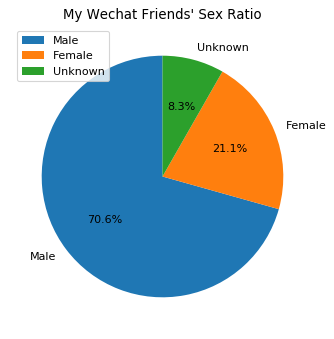

In [14]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**

提示：可以用`for`循环实现

*注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [16]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []

for i in range(1,len(pre_data)):
    if not pre_data[i]["Province"] == '':
        province.append(pre_data[i]["Province"])
    
print(province)




['江苏', 'Know City', '江苏', '江苏', '江苏', '江苏', '陕西', '江苏', 'Firenze', '江苏', 'Hsinchu City', '湖南', '江苏', '江苏', '浙江', '江苏', '上海', '北京', '江苏', '江苏', '江苏', '江苏', '四川', '云南', '四川', '江苏', '上海', '陕西', '北京', '台湾', '浙江', '上海', '江苏', '广东', '江苏', '江苏', '江苏', '北京', '广东', '广东', '北京', '广东', '河南', '安徽', '江苏', '江西', '浙江', '江苏', '北京', '上海', '广东', '广东', '上海', '福建', '广东', '上海', '湖南', '江苏', '北京', '上海', '江苏', '广东', '河北', '上海', '江苏', '江苏', '北京', '上海', '江苏', '北京', '北京', '江苏', '天津', '浙江', '广东', '江苏', '上海', '湖北', '北京', '贵州', '江苏', '北京', '江苏', '巴黎', '上海', '上海', '上海', '江苏', '江苏', '广东', '上海', '陕西', '上海', '江苏', '上海', '陕西']


In [17]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

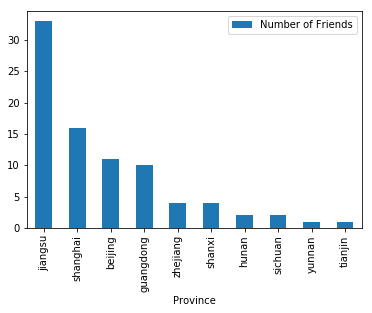

In [18]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出最长的3个个性签名

In [28]:
### TODO：打印最长的3个个性签名
Signatures = []
for data in pre_data:   
    Signatures.append(data["Signature"])
    
Signatures = sorted(Signatures,key = lambda i:len(i),reverse = False)
print(Signatures[-3:])    

['I will love you with every beat of my heart.', 'I am tired of reading stories about great men.', '除了努力之外就还是努力<span class="emoji emoji1f4aa"></span>']


In [29]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/xn/5zfgr8ts6jg_8x6bbn9c3vlm0000gn/T/jieba.cache
Loading model cost 1.083 seconds.
Prefix dict has been built succesfully.


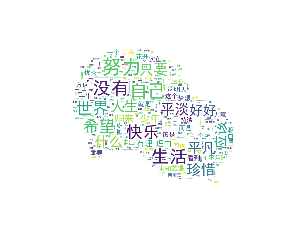

In [30]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

In [31]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

提示：可以用循环语句或者列表表达式实现。

In [32]:
### 以下内容无需修改，直接运行即可
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

In [33]:
### TODO：统计sentiments中大于0.66的个数
positive = 0
for count in sentiments:
    if count > 0.66:
        positive +=1 
            
print(positive)
### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = 0
for count in sentiments:
    if 0.33 <= count <=0.66:
        neutral +=1 
            
print(neutral)
### TODO：统计sentiments中小于0.33的个数
negative = len(sentiments) - positive - neutral
print(negative)

63
33
8


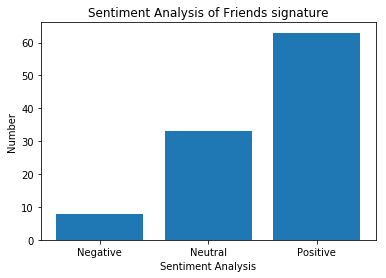

In [34]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**